# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)
style.use('fivethirtyeight')
#plt.xkcd()

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# other packages
from sklearn import preprocessing
from scipy.stats import lognorm

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
############################
# COVID DATA SECTION
############################
covid = pd.read_csv('./data/covid.csv')
covid = covid.drop(covid.columns[0], axis=1)
cols_covid = ['Continent', 'Country', 'Date', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']
covid.columns = cols_covid
covid['Date'] = pd.to_datetime(covid['Date'])
covid = covid[covid["Country"] == 'United States']
covid.head()

# filter our pharmaceutical company stocks in relation to time period of COVID
covidPharmStocks = pd.read_csv('./stocks_data/pharmstocks.csv')
covidPharmStocks['Date'] = pd.to_datetime(covidPharmStocks['Date'])
covidPharmStocks = covidPharmStocks[covidPharmStocks["Date"] >= '2019-12-15']
covidPharmStocks['Pct Change'] = covidPharmStocks['Price'].pct_change()
covidPharmStocks.head()

# filter Dow Jones Index in relation to time period of COVID
covidDow = pd.read_csv('./stocks_data/^DJI.csv')
covidDow['Date'] = pd.to_datetime(covidDow['Date'])
covidDow = covidDow[covidDow["Date"] >= '2019-12-15']
covidDow['Pct Change'] = covidDow['Price'].pct_change()
covidDow['Symbol'] = 'DOW'
covidDow.head()

,Date,Price,Pct Change,Symbol
7042,2019-12-16,28235.890625,NaN,DOW
7043,2019-12-17,28267.160156,0.001107,DOW
7044,2019-12-18,28239.279297,-0.000986,DOW
7045,2019-12-19,28376.960938,0.004876,DOW
7046,2019-12-20,28455.089844,0.002753,DOW


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0.5, 1.0, 'Pharmacy stock Prices vs. COVID Cases')

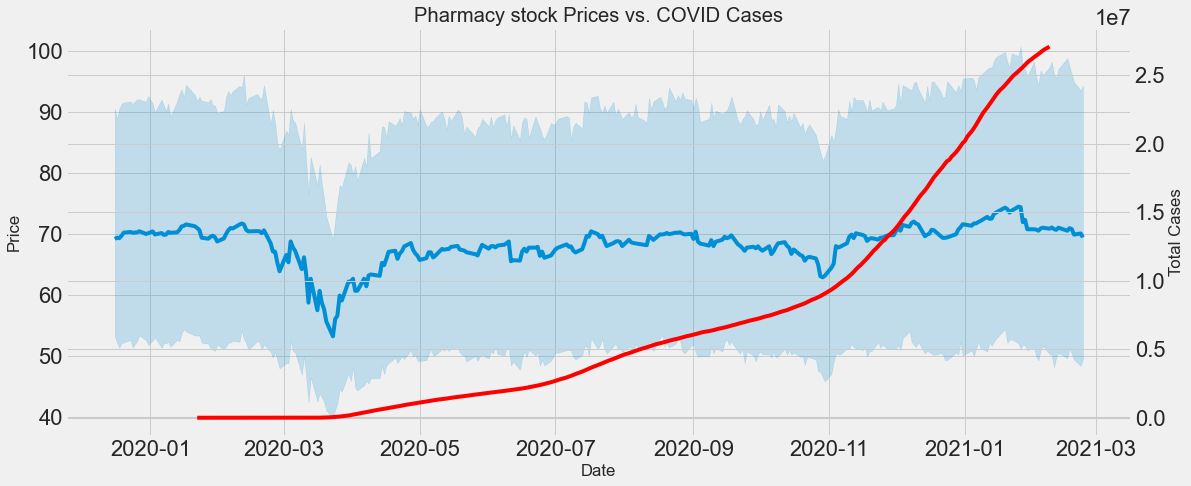

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Price of pharma companies stocks plotted with total covid cases
ax = sns.lineplot(data=covidPharmStocks, x="Date", y="Price")
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='red').set_title('Pharmacy stock Prices vs. COVID Cases')

Text(0.5, 1.0, 'Dow Jones Stock Prices vs. COVID cases')

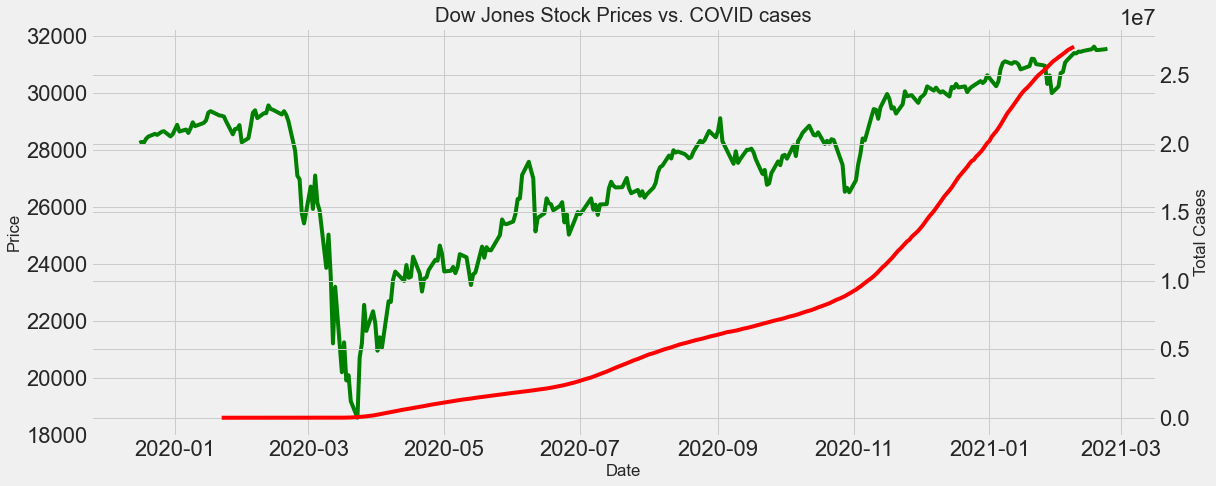

In [4]:
# General trend of Dow Jones prices plotted with covid cases
ax = sns.lineplot(data = covidDow, x = 'Date', y = 'Price', color = 'green')
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Dow Jones Stock Prices vs. COVID cases')

In [5]:
covidDow = covidDow.dropna()
covidDow['Norm Price'] = preprocessing.normalize(np.array(covidDow['Price']).reshape(1, -1)).reshape(-1, 1)
covidDow['Norm Pct Change'] = covidDow['Price'].pct_change()
covidDow = covidDow.dropna()
covidDow

,Date,Price,Pct Change,Symbol,Norm Price,Norm Pct Change
7044,2019-12-18,28239.279297,-0.000986,DOW,0.059357,-0.000986
7045,2019-12-19,28376.960938,0.004876,DOW,0.059647,0.004876
7046,2019-12-20,28455.089844,0.002753,DOW,0.059811,0.002753
7047,2019-12-23,28551.529297,0.003389,DOW,0.060014,0.003389
7048,2019-12-24,28515.449219,-0.001264,DOW,0.059938,-0.001264
...,...,...,...,...,...,...
7336,2021-02-17,31613.019531,0.002864,DOW,0.066449,0.002864
7337,2021-02-18,31493.339844,-0.003786,DOW,0.066197,-0.003786
7338,2021-02-19,31494.320313,0.000031,DOW,0.066199,0.000031
7339,2021-02-22,31521.689453,0.000869,DOW,0.066257,0.000869


In [6]:
covidPharmStocks = covidPharmStocks.dropna()
covidPharmStocks['Norm Price'] = preprocessing.normalize(np.array(covidPharmStocks['Price']).reshape(1, -1)).reshape(-1, 1)
covidPharmStocks['Norm Pct Change'] = covidPharmStocks['Price'].pct_change()
covidPharmStocks = covidPharmStocks.dropna()
covidPharmStocks

,Date,Price,Symbol,Pct Change,Norm Price,Norm Pct Change
5816,2019-12-18,89.984589,NVS,-0.003846,0.021755,-0.003846
5817,2019-12-19,90.968864,NVS,0.010938,0.021993,0.010938
5818,2019-12-20,90.988167,NVS,0.000212,0.021997,0.000212
5819,2019-12-23,91.547859,NVS,0.006151,0.022133,0.006151
5820,2019-12-24,91.499611,NVS,-0.000527,0.022121,-0.000527
...,...,...,...,...,...,...
86956,2021-02-17,164.633392,JNJ,0.003574,0.039802,0.003574
86957,2021-02-18,164.712906,JNJ,0.000483,0.039821,0.000483
86958,2021-02-19,161.969986,JNJ,-0.016653,0.039158,-0.016653
86959,2021-02-22,161.869995,JNJ,-0.000617,0.039134,-0.000617


Text(0.5, 1.0, 'Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. COVID Cases')

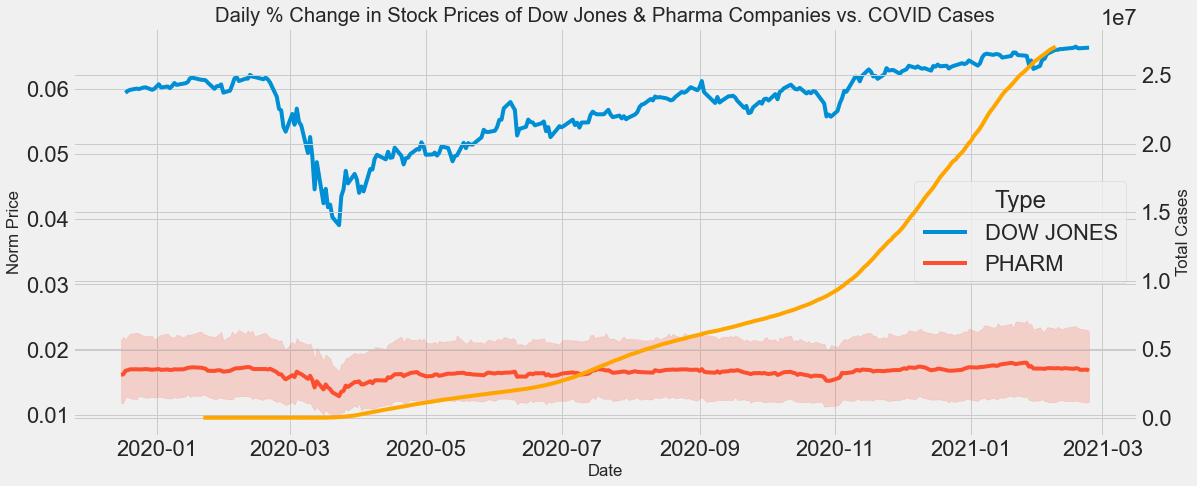

In [7]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and Covid
covidPharmStocks['Type'] = 'PHARM'
covidDow['Type'] = 'DOW JONES'
frames = [covidDow, covidPharmStocks]
stocks = pd.concat(frames)

ax = sns.lineplot(data=stocks, x="Date", y="Norm Price", hue='Type')
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='orange').set_title('Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. COVID Cases')


In [8]:
stocks = stocks.dropna()

Text(0.5, 1.0, 'Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. COVID Cases')

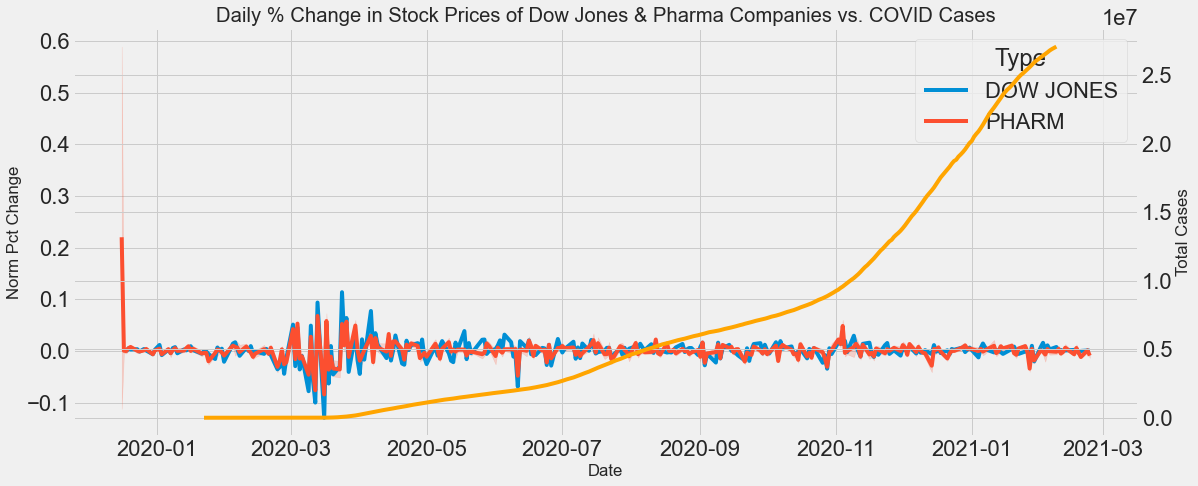

In [9]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and Covid
ax = sns.lineplot(data=stocks, x="Date", y="Norm Pct Change", hue='Type')
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='orange').set_title('Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. COVID Cases')


In [15]:
covid

,Continent,Country,Date,Total Cases,New Cases,Total Deaths,New Deaths
64011,North America,United States,2020-01-22,1.0,NaN,NaN,NaN
64012,North America,United States,2020-01-23,1.0,0.0,NaN,NaN
64013,North America,United States,2020-01-24,2.0,1.0,NaN,NaN
64014,North America,United States,2020-01-25,2.0,0.0,NaN,NaN
64015,North America,United States,2020-01-26,5.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...
64390,North America,United States,2021-02-04,26680214.0,123188.0,455881.0,5084.0
64391,North America,United States,2021-02-05,26813772.0,133558.0,459555.0,3674.0
64392,North America,United States,2021-02-06,26917787.0,104015.0,462169.0,2614.0
64393,North America,United States,2021-02-07,27007368.0,89581.0,463476.0,1307.0


In [52]:
covidPharmStocks = covidPharmStocks[covidPharmStocks['Date'] >= '2020-01-22']

In [60]:
covidPharmStocks

,Date,Price,Symbol,Pct Change,Norm Price,Norm Pct Change,Type
5838,2020-01-22,91.875946,NVS,0.000210,0.022212,0.000210,PHARM
5839,2020-01-23,91.596107,NVS,-0.003046,0.022144,-0.003046,PHARM
5840,2020-01-24,90.582878,NVS,-0.011062,0.021899,-0.011062,PHARM
5841,2020-01-27,90.418823,NVS,-0.001811,0.021860,-0.001811,PHARM
5842,2020-01-28,92.194397,NVS,0.019637,0.022289,0.019637,PHARM
...,...,...,...,...,...,...,...
86956,2021-02-17,164.633392,JNJ,0.003574,0.039802,0.003574,PHARM
86957,2021-02-18,164.712906,JNJ,0.000483,0.039821,0.000483,PHARM
86958,2021-02-19,161.969986,JNJ,-0.016653,0.039158,-0.016653,PHARM
86959,2021-02-22,161.869995,JNJ,-0.000617,0.039134,-0.000617,PHARM


In [53]:
sumPercentChange = sum(abs(covidPharmStocks['Norm Pct Change']))
sumPercentChange

37.68452585595149

In [54]:
first = int(len(covidPharmStocks)/3)
second = 2*first
third = 3*first
sumone = abs(covidPharmStocks[:first]['Norm Pct Change']).mean()
sumtwo = abs(covidPharmStocks[first:second]['Norm Pct Change']).mean()
sumthree = abs(covidPharmStocks[second:]['Norm Pct Change']).mean()
print(sumone, sumtwo, sumthree)


0.014106112278764826 0.014531642041539799 0.01245769372326292


In [55]:
covidPharmStocks[:first]

,Date,Price,Symbol,Pct Change,Norm Price,Norm Pct Change,Type
5838,2020-01-22,91.875946,NVS,0.000210,0.022212,0.000210,PHARM
5839,2020-01-23,91.596107,NVS,-0.003046,0.022144,-0.003046,PHARM
5840,2020-01-24,90.582878,NVS,-0.011062,0.021899,-0.011062,PHARM
5841,2020-01-27,90.418823,NVS,-0.001811,0.021860,-0.001811,PHARM
5842,2020-01-28,92.194397,NVS,0.019637,0.022289,0.019637,PHARM
...,...,...,...,...,...,...,...
27874,2020-05-26,52.688789,AZN,-0.038211,0.012738,-0.038211,PHARM
27875,2020-05-27,52.053864,AZN,-0.012050,0.012585,-0.012050,PHARM
27876,2020-05-28,53.075695,AZN,0.019630,0.012832,0.019630,PHARM
27877,2020-05-29,54.166969,AZN,0.020561,0.013096,0.020561,PHARM


In [56]:
covidPharmStocks[first:second]

,Date,Price,Symbol,Pct Change,Norm Price,Norm Pct Change,Type
27879,2020-06-02,54.286022,AZN,-0.007977,0.013124,-0.007977,PHARM
27880,2020-06-03,54.563797,AZN,0.005117,0.013191,0.005117,PHARM
27881,2020-06-04,53.442760,AZN,-0.020545,0.012920,-0.020545,PHARM
27882,2020-06-05,53.422916,AZN,-0.000371,0.012916,-0.000371,PHARM
27883,2020-06-08,52.162994,AZN,-0.023584,0.012611,-0.023584,PHARM
...,...,...,...,...,...,...,...
49365,2020-10-05,50.980000,SNY,0.009905,0.012325,0.009905,PHARM
49366,2020-10-06,49.730000,SNY,-0.024519,0.012023,-0.024519,PHARM
49367,2020-10-07,49.500000,SNY,-0.004625,0.011967,-0.004625,PHARM
49368,2020-10-08,50.360001,SNY,0.017374,0.012175,0.017374,PHARM


In [57]:
covidPharmStocks[second:]

,Date,Price,Symbol,Pct Change,Norm Price,Norm Pct Change,Type
49370,2020-10-12,51.080002,SNY,0.005314,0.012349,0.005314,PHARM
49371,2020-10-13,51.470001,SNY,0.007635,0.012443,0.007635,PHARM
49372,2020-10-14,51.139999,SNY,-0.006412,0.012364,-0.006412,PHARM
49373,2020-10-15,49.959999,SNY,-0.023074,0.012078,-0.023074,PHARM
49374,2020-10-16,50.270000,SNY,0.006205,0.012153,0.006205,PHARM
...,...,...,...,...,...,...,...
86956,2021-02-17,164.633392,JNJ,0.003574,0.039802,0.003574,PHARM
86957,2021-02-18,164.712906,JNJ,0.000483,0.039821,0.000483,PHARM
86958,2021-02-19,161.969986,JNJ,-0.016653,0.039158,-0.016653,PHARM
86959,2021-02-22,161.869995,JNJ,-0.000617,0.039134,-0.000617,PHARM


In [61]:
##### PRE COVID #####
# filter our pharmaceutical company stocks in relation to time period of COVID
precovidPharmStocks = pd.read_csv('./stocks_data/pharmstocks.csv')
precovidPharmStocks['Date'] = pd.to_datetime(precovidPharmStocks['Date'])
precovidPharmStocks = precovidPharmStocks[(precovidPharmStocks["Date"] >= '2019-01-22') & (precovidPharmStocks["Date"] < '2020-01-22')]
precovidPharmStocks['Pct Change'] = precovidPharmStocks['Price'].pct_change()
precovidPharmStocks.head()

,Date,Price,Symbol,Pct Change
5586,2019-01-22,73.725754,NVS,NaN
5587,2019-01-23,73.583847,NVS,-0.001925
5588,2019-01-24,72.123024,NVS,-0.019852
5589,2019-01-25,71.747375,NVS,-0.005208
5590,2019-01-28,71.496964,NVS,-0.003490


In [63]:
precovidPharmStocks = precovidPharmStocks.dropna()
precovidPharmStocks['Norm Price'] = preprocessing.normalize(np.array(precovidPharmStocks['Price']).reshape(1, -1)).reshape(-1, 1)
precovidPharmStocks['Norm Pct Change'] = precovidPharmStocks['Price'].pct_change()
precovidPharmStocks = precovidPharmStocks.dropna()
precovidPharmStocks

,Date,Price,Symbol,Pct Change,Norm Price,Norm Pct Change
5588,2019-01-24,72.123024,NVS,-0.019852,0.020830,-0.019852
5589,2019-01-25,71.747375,NVS,-0.005208,0.020721,-0.005208
5590,2019-01-28,71.496964,NVS,-0.003490,0.020649,-0.003490
5591,2019-01-29,72.281624,NVS,0.010975,0.020875,0.010975
5592,2019-01-30,71.513649,NVS,-0.010625,0.020654,-0.010625
...,...,...,...,...,...,...
86680,2020-01-14,145.591614,JNJ,0.005628,0.042048,0.005628
86681,2020-01-15,146.078506,JNJ,0.003344,0.042188,0.003344
86682,2020-01-16,147.260956,JNJ,0.008095,0.042530,0.008095
86683,2020-01-17,148.224823,JNJ,0.006545,0.042808,0.006545


<AxesSubplot:xlabel='Date', ylabel='Norm Price'>

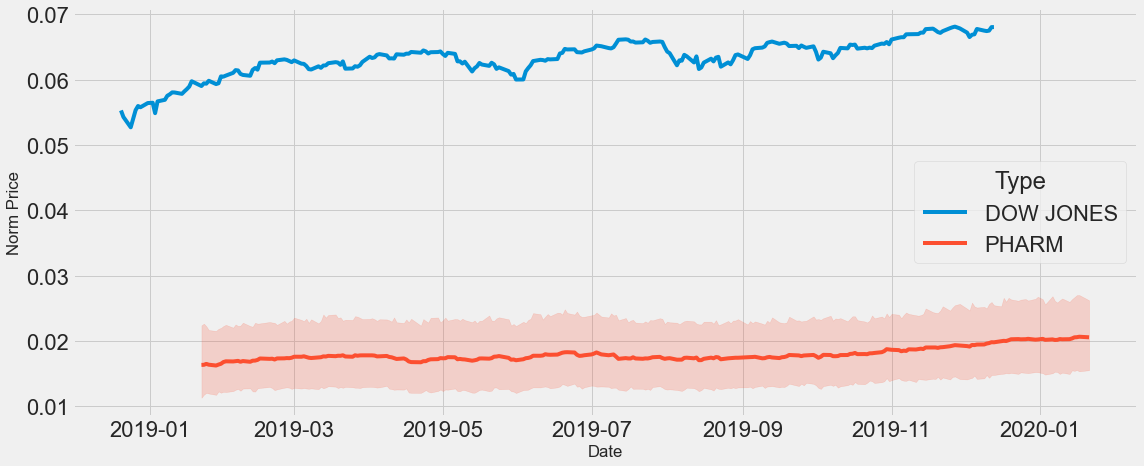

In [64]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and Covid
precovidPharmStocks['Type'] = 'PHARM'
precovidDow['Type'] = 'DOW JONES'
frames = [precovidDow, precovidPharmStocks]
prestocks = pd.concat(frames)

sns.lineplot(data=prestocks, x="Date", y="Norm Price", hue='Type')

<AxesSubplot:xlabel='Date', ylabel='Norm Pct Change'>

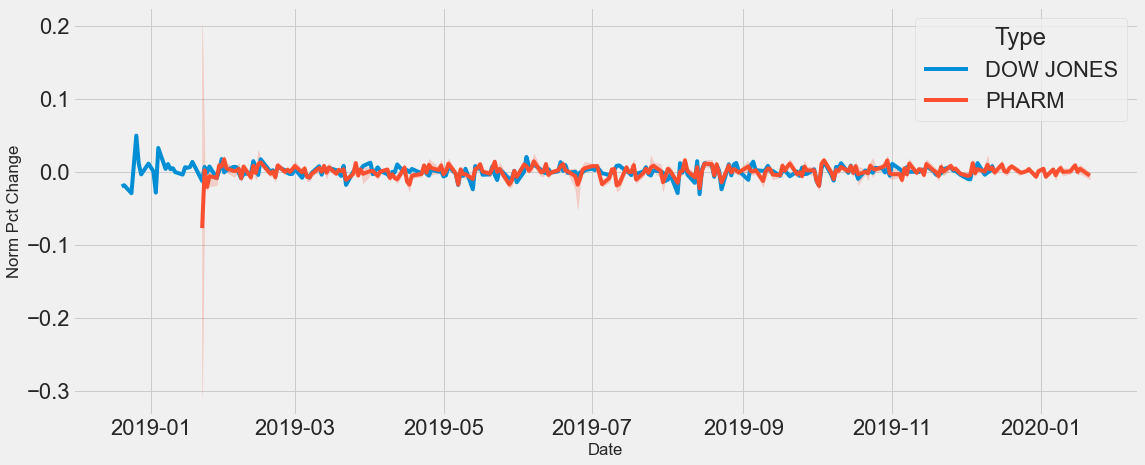

In [65]:
sns.lineplot(data=prestocks, x="Date", y="Norm Pct Change", hue='Type')

In [67]:
presumPercentChange = abs(precovidPharmStocks['Norm Pct Change']).mean()
presumPercentChange

0.009299048111320417

In [68]:
first = int(len(precovidPharmStocks)/3)
second = 2*first
third = 3*first
sumone = abs(precovidPharmStocks[:first]['Norm Pct Change']).mean()
sumtwo = abs(precovidPharmStocks[first:second]['Norm Pct Change']).mean()
sumthree = abs(precovidPharmStocks[second:]['Norm Pct Change']).mean()
print(sumone, sumtwo, sumthree)


0.009805474377777245 0.008689913410997901 0.009401634273241024


# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*